In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib notebook

In [2]:
file = "../cardio_dosis_data/CARDIOLOGIA DF_H.csv"

In [3]:
data = pd.read_csv(file, usecols={'EDAD','PESO', 'TALLA', 'TIEMPO','mGy','pGym', 'IMÁGENES'})
data.head()

,EDAD,PESO,TALLA,TIEMPO,mGy,pGym,IMÁGENES
0,75,72.0,1.60,3.25,85.0,4209.9,3
1,49,78.0,1.68,7.60,1301.0,8858.6,18
2,78,60.0,1.58,10.04,128.0,6979.5,5
3,48,115.0,1.70,30.60,1906.0,22416.8,13
4,81,80.0,1.76,2.45,206.0,1026.5,11


In [4]:
type(data)
data.isin(['NaN']).any()

EDAD        False
PESO        False
TALLA       False
TIEMPO      False
mGy         False
pGym        False
IMÁGENES    False
dtype: bool

In [5]:
data_vals = data.values
len(data_vals)

593

In [17]:
pca = PCA(n_components=3)
pca.fit(data_vals)
data_vals = pca.transform(data_vals)
for element in data_vals:
    print(element)

[-1406.77925248   521.47619896     6.97333702]
[3364.00339452  -52.03607789   -5.97857261]
[1343.00067118  854.81646016   24.52734225]
[16878.82841619  1189.61323197   -17.27882189]
[-4.54424785e+03 -3.07266863e+01 -3.99426922e+00]
[-2787.9234934     98.08449798   -24.04535699]
[-4068.80330695    51.63233549   -13.45347735]
[-4347.29698365   180.96712735    13.8554818 ]
[3.28594947e+03 1.09700271e+03 3.26622774e+00]
[-983.45504432 -318.03179916   -6.52059725]
[2921.82435783  -79.56771319    3.54010855]
[-330.33792409  652.84108667    2.22865529]
[-629.03367892   31.44640992    1.57487334]
[4800.25576421  148.98041044  -30.61958569]
[-460.24750426  -21.09888172    8.59769422]
[-529.73767504  -26.49369707   -1.49968065]
[-270.82267129  664.08977265    7.97352367]
[-3498.34026136    96.41380737     6.77579957]
[-3703.95944023    64.2751127     -4.35193248]
[-2711.54668931    86.19687366    -6.02890047]
[  93.64355784 -223.08222942  -18.12616776]
[9943.52059756  234.00729073  -13.71742648]

In [18]:
print(pca.score(data_vals))
print(pca.components_)
print(pca.explained_variance_)

-21.565895050270427
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  1.00000000e+00  4.44089210e-16]
 [ 0.00000000e+00 -4.57966998e-16  1.00000000e+00]]
[2.71565378e+07 1.74363829e+05 2.29795590e+02]


In [19]:
principalDf = pd.DataFrame(data = data_vals,
             columns = ['principal component 1', 'principal component 2',  'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-1406.779252,521.476199,6.973337
1,3364.003395,-52.036078,-5.978573
2,1343.000671,854.816460,24.527342
3,16878.828416,1189.613232,-17.278822
4,-4544.247853,-30.726686,-3.994269
...,...,...,...
588,15468.652363,1221.467517,-28.714001
589,-3256.218319,-79.212105,-11.070524
590,-2768.036949,-449.338014,-13.374064
591,-1823.449289,103.809852,17.276455


In [20]:
n_samples = data_vals.shape[0]
# We center the data and compute the sample covariance matrix.
X_centered = data_vals - np.mean(data_vals, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

27110742.637934335
27156537.811309222
174069.79248390862
174363.82929553697
229.40807676314986
229.79559040633097


In [21]:
#kmeans2 = KMeans(n_clusters=2, random_state=0).fit(nparray)
leng = len(data_vals)
print(np.min(data_vals), np.max(data_vals))
print(np.shape(data_vals))
#plt.scatter(nparray)

-5535.223150968143 28484.617682157863
(593, 3)


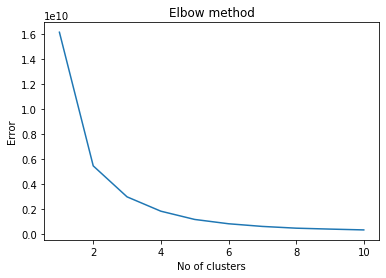

In [22]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(data_vals)
    kmeans.fit(data_vals)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(nparray)
print(y_kmeans)

kmeans.cluster_centers_

[0 2 2 1 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 2 1 1 2 2 1 0 2 1 1 0 0 1 1 0 0 1
 2 0 2 2 0 0 1 2 2 1 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 2
 1 0 0 0 2 0 0 0 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 1 0 1 0 0 2 0 0 0 2 1 0 0 2 0 1 0 0 0 2 0 0
 0 0 0 0 2 0 2 0 1 0 0 2 0 0 1 1 1 0 0 2 2 0 2 0 0 0 1 1 2 0 2 2 2 1 0 2 2
 2 0 0 0 0 0 0 0 2 0 0 0 1 0 2 2 2 1 0 0 0 0 1 1 0 2 2 0 1 0 0 1 0 0 0 2 2
 0 0 2 0 0 0 0 2 0 0 0 1 0 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2
 0 0 0 0 2 2 2 2 2 0 1 2 0 0 0 2 2 2 2 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 1 0 2
 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0
 2 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 1 0
 1 1 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0
 0 0 0 0 0 2 0 2 2 1 0 2 2 2 0 2 2 0 0 1 2 0 0 0 0 1 0 2 1 2 2 0 0 0 0 0 2
 0 0 0 2 2 2 2 0 0 1 0 1 0 1 1 0 2 0 0 2 0 0 0 0 2 2 1 2 0 2 2 2 0 2 0 2 0
 0 0 0 0 2 0 0 2 0 0 2 2 

array([[-3.03464263e+03,  2.69903695e+01,  2.09417229e-01],
       [ 1.24955197e+04,  7.96670296e+01,  9.93569875e-01],
       [ 2.82459100e+03, -8.79476106e+01, -8.06001428e-01]])

In [24]:
for i, item in enumerate(kmeans.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))

Centro del centroide No 1 es: 
 [-3.03464263e+03  2.69903695e+01  2.09417229e-01] 

Centro del centroide No 2 es: 
 [1.24955197e+04 7.96670296e+01 9.93569875e-01] 

Centro del centroide No 3 es: 
 [ 2.82459100e+03 -8.79476106e+01 -8.06001428e-01] 



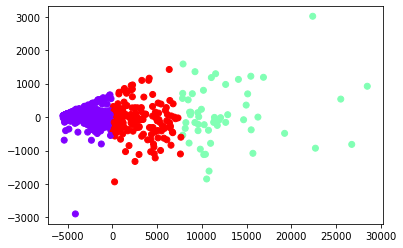

In [25]:
plt.scatter(nparray[:,0],nparray[:,1],c=y_kmeans,cmap='rainbow') 

<IPython.core.display.Javascript object>


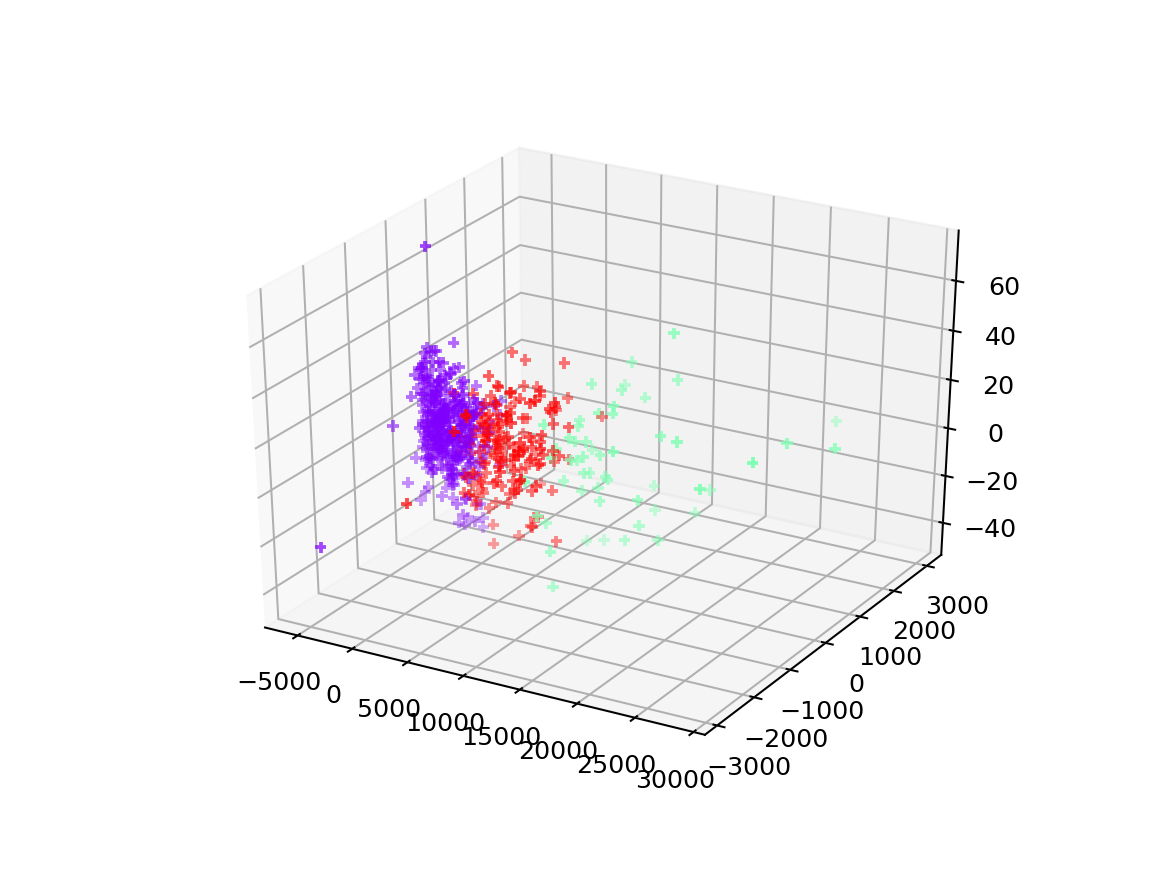

In [33]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nparray[:,0],nparray[:,1], nparray[:,2], marker='+', c=y_kmeans, cmap='rainbow')